In [1]:
#importing libraries
import pandas as pd #to read data and create data frame
import numpy as np #for simple mathematical operations
import matplotlib.pyplot as plt # for vizualization
import seaborn as sns # for vizualization
import re # for regular experssion in string
import string # for string use
import nltk # For natural language processing
from nltk.stem.porter import PorterStemmer #For Stemming words
pos=PorterStemmer() # Initializing PortStemmer
from wordcloud import WordCloud # To vizualize the most used words
from sklearn.feature_extraction.text import CountVectorizer #To vectorizing the data for further analysis.
Vect=CountVectorizer(max_df=0.9,min_df=2,max_features=3500, stop_words='english') #Initializing the module with some HyperParameters
from sklearn.linear_model import LogisticRegression #Using logistic regression as the outcome is categorical data
LogReg= LogisticRegression() #Initializing the Module
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix # Analyzing  Matrices
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Reading the data and to viewing top 5 entries.
data=pd.read_csv("Twiter_train.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# Getting the data information and checking for missing values. 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


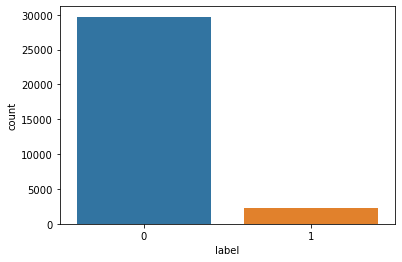

The number of positive labels are:- 29720 

The number of negative labels are:- 2242


In [4]:
# Visualizing the the number of positive(0) and negative(1) labels
sns.countplot(data["label"])
plt.show()
print(f"The number of positive labels are:- {list(data.label).count(0)} \n")
print(f"The number of negative labels are:- {list(data.label).count(1)}")

In [5]:
# Removing the user names and the punctuation marks for further analysis.
data["ClearTweet"]=data["tweet"].str.replace("@[\w]*", " ")
data["ClearTweet"]=data["ClearTweet"].str.replace("[^a-zA-z#]", " ")
data["ClearTweet"]=data["ClearTweet"].apply(
                                        lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,ClearTweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [6]:
# Tokenizing the Clear tweets and Stemming them for analysis.
tokenized=data["ClearTweet"].apply(lambda x: x.split())
stemmed=tokenized.apply(lambda sentence: [pos.stem(word) for word in sentence])
stemmed.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: ClearTweet, dtype: object

In [7]:
# Creating complete sentence from the tokenized stemmed words stored as lists.
for i in range(len(stemmed)):
    stemmed[i]=" ".join(stemmed[i])
data["TokenizedStemmedTweet"]=stemmed
data.head()

,id,label,tweet,ClearTweet,TokenizedStemmedTweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation,factsguid societi #motiv


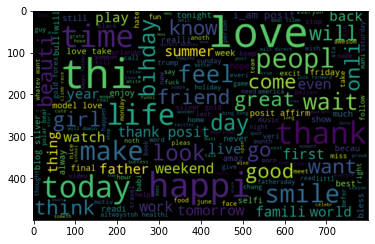

In [8]:
# Merging all the data to vizualize the most frequent used words.
text=" ".join([wrd for wrd in data["TokenizedStemmedTweet"]])
wordcloud= WordCloud(width=800,height=500,random_state=42, max_font_size=100).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [9]:
# Tokenizing the Complete text to count the frequency of the used used words and diplaying the top 10 of them.
from nltk.tokenize import word_tokenize
tkn=word_tokenize(text)
from nltk.probability import FreqDist
fdist=FreqDist()
for i in tkn:
    fdist[i]=fdist[i]+1
top_10=fdist.most_common(10)
top_10

[('#', 73551),
 ('love', 3221),
 ('thi', 2686),
 ('with', 2531),
 ('happi', 2096),
 ('that', 2095),
 ('have', 1848),
 ('your', 1738),
 ('thank', 1580),
 ('just', 1368)]

In [10]:
# Creating a function to define store the hashtags.
def hash(tweet):
    hashtgs=[]
    for word in tweet:
        ht= re.findall(r"#(\w+)",word)
        hashtgs.append(ht)
    return hashtgs

In [11]:
# Extracting the hashtags for negative and positive labels and storing them.
hash_pos=hash(data["TokenizedStemmedTweet"][data["label"]==0])
hash_pos= sum(hash_pos,[])
hash_neg=hash(data["TokenizedStemmedTweet"][data["label"]==1])
hash_neg= sum(hash_neg,[])

In [12]:
#Showing the negative Hashtags and their count
print("The negative Hashtags are:- \n",np.array(hash_neg).reshape(len(hash_neg),1))
print("The total number of negative Hashtags are:- \n", len(hash_neg))

The negative Hashtags are:- 
 [['cnn']
 ['michigan']
 ['tcot']
 ...
 ['templ']
 ['calgari']
 ['wso']]
The total number of negative Hashtags are:- 
 4616


In [13]:
#Showing the positive Hashtags and their count
print("The positive Hashtags are:- \n",np.array(hash_pos).reshape(len(hash_pos),1))
print("The total number of positive Hashtags are:- \n", len(hash_pos))

The positive Hashtags are:- 
 [['run']
 ['lyft']
 ['disapoint']
 ...
 ['summ']
 ['shame']
 ['imwithh']]
The total number of positive Hashtags are:- 
 68786


In [14]:
# Creating a function to count the most common hashtags.
def top_20(data):
    freq_pos= nltk.FreqDist(data)
    top20=freq_pos.most_common(20)
    top20_df=pd.DataFrame(top20,columns=["Hashtag","Count"])
    plt.figure(figsize=(18,6))
    sns.barplot(top20_df["Hashtag"],top20_df["Count"])
    return(plt.show())

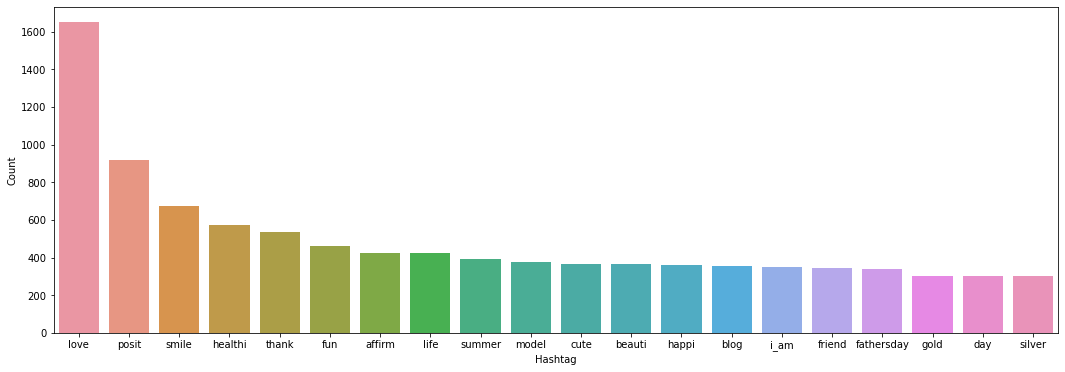

In [15]:
#Using the function to vizualize the top 20 positive hashtags and their frequency.
top_20(hash_pos)

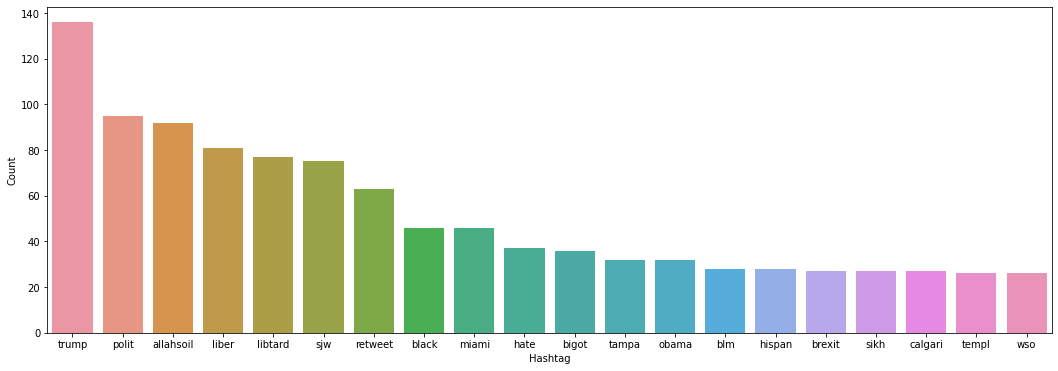

In [16]:
#Using the function to vizualize the top 20 negative hashtags and their frequency.
top_20(hash_neg)

In [17]:
# vectorizing the Tokenized and Stemmed Tweets and fitting the whole data to the Logistic Regression Model.
vect= Vect.fit_transform(data["TokenizedStemmedTweet"])
mdl=LogReg.fit(vect,data["label"])

In [18]:
# Predicting the whole X test data and saving it.
pred=mdl.predict(vect)

In [19]:
# Calculating the evaluation scores and saving.
f1=f1_score(data["label"],pred)
ac=accuracy_score(data["label"],pred)
cm=confusion_matrix(data["label"],pred)

In [20]:
# Printing the evaluation scores.
print(f"The confussion matrix is :- \n {cm} \n\n")
print(f"The accuracy score is :- {round(ac*100,2)}% \n")
print(f"The f1 score is :- {round(f1*100,2)}% ") 

The confussion matrix is :- 
 [[29618   102]
 [  858  1384]] 


The accuracy score is :- 97.0% 

The f1 score is :- 74.25% 
